In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/Timothy/Desktop/zing.csv')

In [18]:
# Summary statistics
df.describe



<bound method NDFrame.describe of       date_of_birth work_class marital_status                      occupation  \
0        26/04/1996  State-gov         Single                    Adm-clerical   
1        02/05/1996  State-gov         Single                  Prof-specialty   
2        15/05/1996  State-gov         Single                    Adm-clerical   
3        17/04/1996  State-gov         Single                  Prof-specialty   
4        22/02/1996  State-gov         Single                    Tech-support   
...             ...        ...            ...                             ...   
32556    06/09/1928                   Widowed  Other-serviceOther-serviceOthe   
32557    14/06/1928                    Single  Other-serviceOther-serviceOthe   
32558    30/09/1928                   Widowed  Other-serviceOther-serviceOthe   
32559    10/03/1928                 Separated  Other-serviceOther-serviceOthe   
32560    11/10/1928                   Married  Other-serviceOther-serviceOt

In [36]:
import pandas as pd

# Load your actual dataset
df = pd.read_csv('/Users/Timothy/Desktop/zing.csv')

# Function to parse dates in different formats
def parse_dates(date_str):
    for fmt in ("%d/%m/%Y", "%Y"):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no valid date format is found

# Apply the function to the 'date_of_birth' column
df['date_of_birth'] = df['date_of_birth'].apply(parse_dates)

# Check for and remove rows with NaT in 'date_of_birth'
invalid_dates = df['date_of_birth'].isna()
if invalid_dates.any():
    print("The following dates could not be parsed and will be removed:")
    print(df[invalid_dates]['date_of_birth'])
    df = df.dropna(subset=['date_of_birth'])

# Calculate age
current_year = 2023
df['age'] = current_year - df['date_of_birth'].dt.year

# Create age groups
bins = [15, 30, 45, 60, 75, 90]
labels = ['16-30', '31-45', '46-60', '61-75', '76-90']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Display age group distribution in a table
age_group_counts = df['age_group'].value_counts().sort_index()

# Convert the Series to a DataFrame for better display
age_group_distribution = age_group_counts.reset_index()
age_group_distribution.columns = ['Age Group', 'Count']

print(age_group_distribution)


The following dates could not be parsed and will be removed:
1005    NaT
16087   NaT
19687   NaT
21743   NaT
25417   NaT
30034   NaT
Name: date_of_birth, dtype: datetime64[ns]
  Age Group  Count
0     16-30   5570
1     31-45  12752
2     46-60   9726
3     61-75   3878
4     76-90    578


In [40]:
import pandas as pd

# Load the dataset

df = pd.read_csv('/Users/Timothy/Desktop/zing.csv')

# Display the first few rows of the dataset
# print(df.head())

# Replace empty fields in 'native_country' with 'Kenya'
df['native_country'].replace('?', 'Kenya', inplace=True)

# Ensure 'work_hours_per_week' is numeric
df['work_hours_per_week'] = pd.to_numeric(df['work_hours_per_week'], errors='coerce')

# Define a function to categorize work_class
def categorize_work_class(work_class):
    if work_class.endswith('gov'):
        return 'Government'
    elif work_class.endswith('priv'):
        return 'Private'
    elif work_class.endswith('unemp'):
        return 'Unemployed'
    else:
        return 'Other'

# Apply the function to create a new column
df['work_class_category'] = df['work_class'].apply(categorize_work_class)

# Display the distribution of the new 'work_class_category' column
print(df['work_class_category'].value_counts())

# Display the first few rows of the updated dataframe
# print(df.head())


work_class_category
Private       23812
Government     4351
Unemployed     2562
Other          1836
Name: count, dtype: int64


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/Timothy/Desktop/zing.csv'
df = pd.read_csv(file_path)

# Replace all empty fields with "Kenya"
df.replace('', 'Kenya', inplace=True)
df.replace('?', 'Kenya', inplace=True)

# Convert date_of_birth to datetime with dayfirst=True
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce', dayfirst=True)

# Calculate age
current_year = 2023
df['age'] = current_year - df['date_of_birth'].dt.year

# Create age groups
bins = [15, 30, 45, 60, 75, 90]
labels = ['16-30', '31-45', '46-60', '61-75', '76-90']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Define a function to categorize work_class
def categorize_work_class(work_class):
    if work_class.endswith('gov'):
        return 'Government'
    elif work_class.endswith('priv'):
        return 'Private'
    elif work_class.endswith('unemp'):
        return 'Unemployed'
    else:
        return 'Other'

# Apply the function to create a new column
df['work_class_category'] = df['work_class'].apply(categorize_work_class)






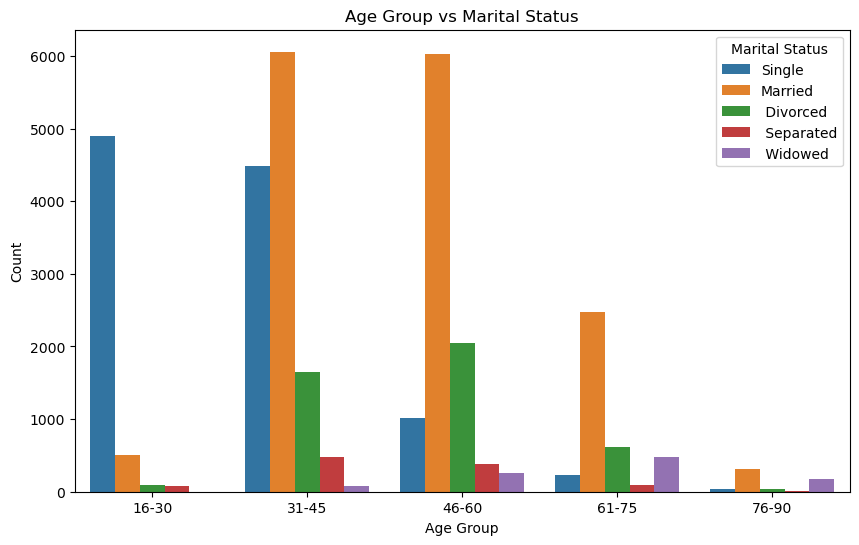

In [49]:
# Plot: Age Group vs Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='marital_status', data=df)
plt.title('Age Group vs Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

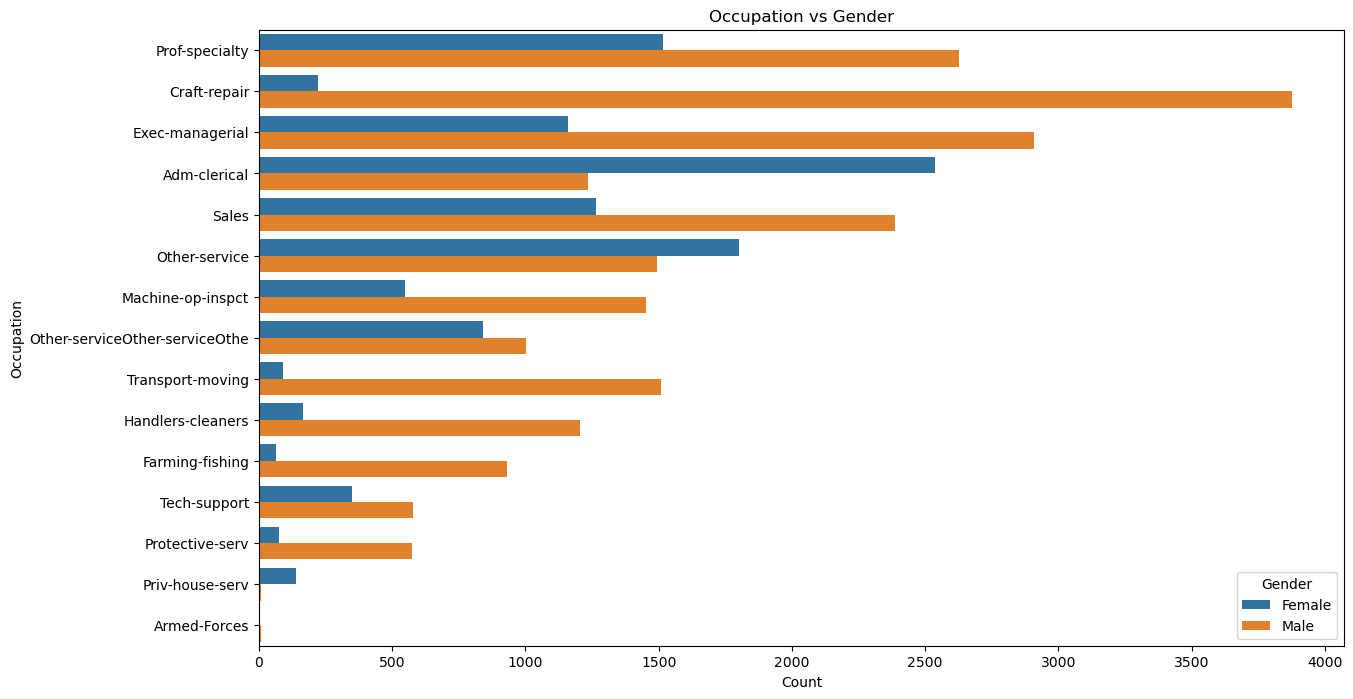

In [50]:
# Plot: Occupation vs Gender
plt.figure(figsize=(14, 8))
sns.countplot(y='occupation', hue='gender', data=df, order=df['occupation'].value_counts().index)
plt.title('Occupation vs Gender')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Gender')
plt.show()

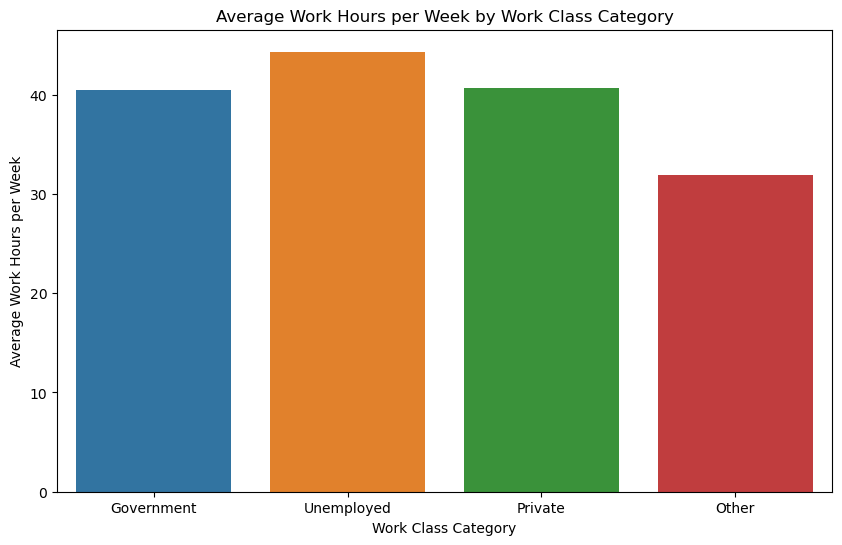

In [51]:

# Plot: Average Work Hours per Week for each Work Class Category
plt.figure(figsize=(10, 6))
sns.barplot(x='work_class_category', y='work_hours_per_week', data=df, estimator=np.mean, errorbar=None)
plt.title('Average Work Hours per Week by Work Class Category')
plt.xlabel('Work Class Category')
plt.ylabel('Average Work Hours per Week')
plt.show()
